In [59]:
import json
import glob
import os
import pprint
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from sklearn.preprocessing import normalize


In [60]:
files = [
    "/accounts/projects/jsteinhardt/sauravkadavath/gene_expression_294_original/checkpoints/deepchrome/*/test_results.json",
    "/accounts/projects/jsteinhardt/sauravkadavath/gene_expression_294_original/checkpoints/exclusive_high/*/test_results.json",
    "/accounts/projects/jsteinhardt/sauravkadavath/gene_expression_294_original/checkpoints/inclusive_high/*/test_results.json",
    "/accounts/projects/jsteinhardt/sauravkadavath/gene_expression_294_original/checkpoints/exclusive_somewhat/*/test_results.json",
    "/accounts/projects/jsteinhardt/sauravkadavath/gene_expression_294_original/checkpoints/inclusive_somewhat/*/test_results.json",
    "/accounts/projects/jsteinhardt/sauravkadavath/gene_expression_294_original/checkpoints/exclusive_random/*/test_results.json",
    "/accounts/projects/jsteinhardt/sauravkadavath/gene_expression_294_original/checkpoints/inclusive_random/*/test_results.json",
    "/accounts/projects/jsteinhardt/sauravkadavath/gene_expression_294_original/checkpoints/exclusive_all/*/test_results.json",
]


def get_results(globstr):
    all_results = dict()
    for fname in glob.glob(globstr):
        cell_id = fname.split("/")[-2]
        with open(fname, 'r') as f:
            results = json.load(f)
        all_results[cell_id] = results[cell_id]['test_auroc']
    return all_results

def get_inclusive_all_results():
    with open("/accounts/projects/jsteinhardt/sauravkadavath/gene_expression_294_original/checkpoints/inclusive_all/test_results.json", 'r') as f:
        results = json.load(f)
    return results
    

In [61]:
all_cells = [
    "E104",
    "E094",
    "E098",
    "E100",
    "E085",
    "E087",
    "E097",
    "E106",
    "E065",
    "E105",
    "E066",
    "E114",
    "E116",
    "E118",
    "E119",
    "E120",
    "E122",
    "E079",
    "E123",
    "E113",
    "E003",
    "E127",
    "E027",
    "E004",
    "E006",
    "E057",
    "E056",
    "E055",
    "E007",
    "E054",
    "E058",
    "E011",
    "E053",
    "E050",
    "E012",
    "E013",
    "E016",
    "E059",
    "E024",
    "E117",
    "E070",
    "E071",
    "E038",
    "E096",
    "E109",
    "E112",
    "E095",
    "E047",
    "E084",
    "E082",
    "E062",
    "E005",
    "E061",
    "E028",
    "E037"
]

matrix = np.ones((len(files) + 1, len(all_cells))) * np.nan
for i, globstr in enumerate(files):
    exp_results = get_results(globstr)
    exp_name = globstr.split("/")[-3]
    for cid, auroc in exp_results.items():
        matrix[i][all_cells.index(cid)] = auroc

for cid, results in get_inclusive_all_results().items():
    matrix[-1][all_cells.index(cid)] = results['test_auroc']


(9, 55)


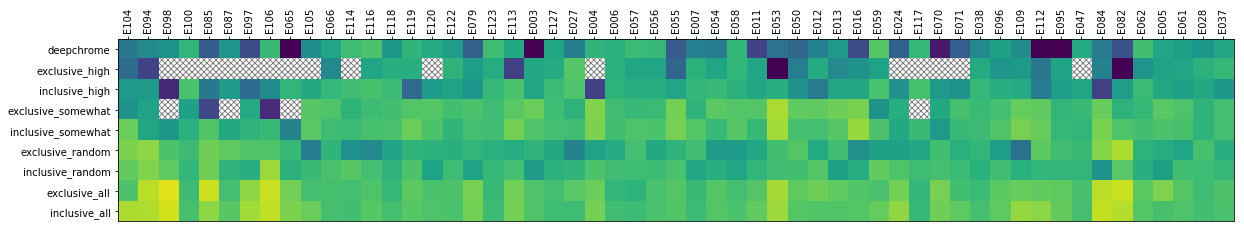

In [62]:
print(matrix.shape)
# Sub norm
# for i in range(len(all_cells)):
#     for j in {1,2,3,4,5,6,7,8}:
#         # print(i, j, matrix[j][i], matrix[0][i])
#         matrix[j][i] = matrix[j][i] - matrix[0][i]
#         # print(i, j, matrix[j][i])
#     matrix[0][i] = 0


for i in range(len(all_cells)):
    cell_avg = 0
    non_nans = 0
    for j in {1,2,3,4,5,6,7,8}:
        if not (matrix[j][i] != matrix[j][i]):
            non_nans += 1
            cell_avg += matrix[j][i]
    
    matrix[:,i] /= (cell_avg / non_nans)

matrix = np.ma.masked_invalid(matrix)
fig, ax = plt.subplots()
ax.figure.set_size_inches(20, 10)
ax.imshow(matrix, norm=matplotlib.colors.Normalize(vmax=1.05, vmin=0.9))
ax.patch.set(hatch='xxxx', edgecolor='gray')
# plt.colorbar()
plt.xticks(range(len(all_cells)), all_cells, rotation=90)
plt.yticks(range(len(files) + 1), [f.split("/")[-3] for f in files] + ["inclusive_all"], rotation=0)
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
